# Preprare configs

This notebook supports the process of preparing config files.
The goals of the notebooks are as follows:
- extracting selected frame(s) from the video
- setting ant testing unwrapping parameters (camera view -> bird's eye view)

In [1]:
import sys
#sys.path.insert(0,'../..')
sys.path.insert(0,'..')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib 

import pickle
from moveoverlib.functions import *

%matplotlib inline

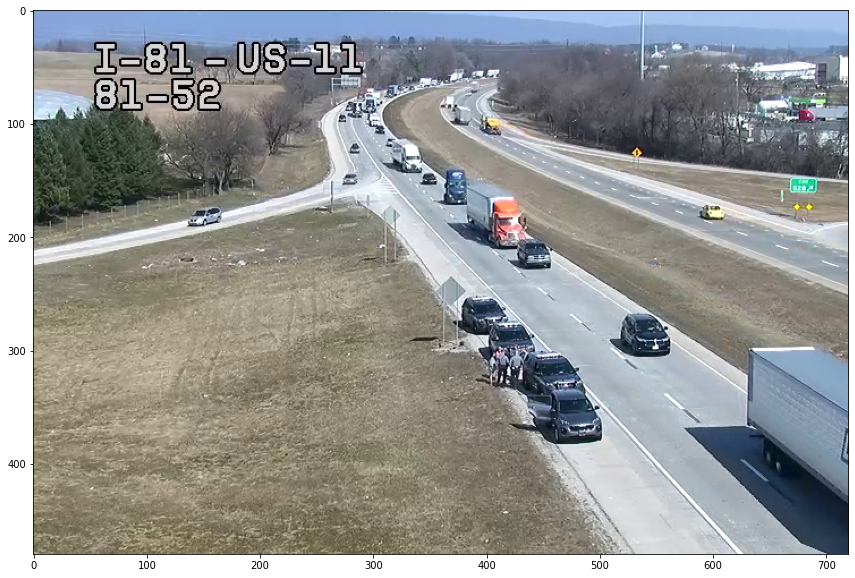

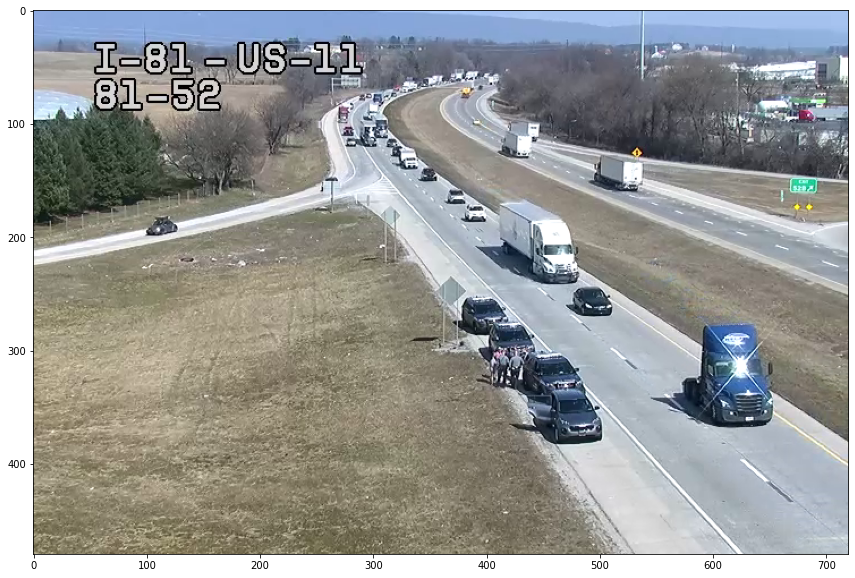

In [2]:
DATA_PATH = '../data/{}'.format(os.getcwd().split('/')[-1])
pathlib.Path(DATA_PATH).mkdir(parents=True, exist_ok=True)

VIDEO_FILE = '/data/MoveOver/Videos/PA/20210404/D8_81-52-2021-03-10 FHWA.mp4'

pickle.dump(VIDEO_FILE, open(f'{DATA_PATH}/videopath.p', 'wb'))

# Create folder for images
pathlib.Path('./images/').mkdir(parents=True, exist_ok=True)

# Extract frames
extractFrame(VIDEO_FILE, frameno = 10, dest_file = './images/frame_view1.jpg');
extractFrame(VIDEO_FILE, frameno = 15*10, dest_file = './images/frame_view2.jpg');


Points for source (camera view) and destination (image view)
First four points are used for unwrapping, the rest is just display at tests

In [16]:

SRC = np.float32([
    [369, 296], # Closer sign
    [264, 178], # Farther sign
    [679, 184], # Closer sign opposite direction
    [533, 141], # Farther sign opposite direction
    [316, 222], # Middle sign
    [264, 84]  # Big sign in the back
])

DST = np.float32([
    [801, 4504], # Closer sign
    [1419, 3694], # Farther sign
    [1730, 4167], # Closer sign opposite direction
    [2255, 3512], # Farther sign opposite direction
    [1088, 4148], # Middle sign
    [3746, 1015] # Big sign in the back
])




print ('  "cameraPoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(SRC[0][0]), int(SRC[0][1]),
    int(SRC[1][0]), int(SRC[1][1]),
    int(SRC[2][0]), int(SRC[2][1]),
    int(SRC[3][0]), int(SRC[3][1])
))

print ('  "birdEyePoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(DST[0][0]), int(DST[0][1]),
    int(DST[1][0]), int(DST[1][1]),
    int(DST[2][0]), int(DST[2][1]),
    int(DST[3][0]), int(DST[3][1]),
))



  "cameraPoints" : [[369, 296], [264, 178], [679, 184], [533, 141]],
  "birdEyePoints" : [[801, 4504], [1419, 3694], [1730, 4167], [2255, 3512]],


In [17]:
M = cv2.getPerspectiveTransform(SRC[:4], DST[:4])
Minv = cv2.getPerspectiveTransform(DST[:4], SRC[:4])

[369. 296.] -> [ 801. 4504.]
[264. 178.] -> [1419. 3694.]
[679. 184.] -> [1730. 4167.]
[533. 141.] -> [2255. 3512.]
[316. 222.] -> [1106.6332 4126.3633]
[264.  84.] -> [4252.5957  545.1057]


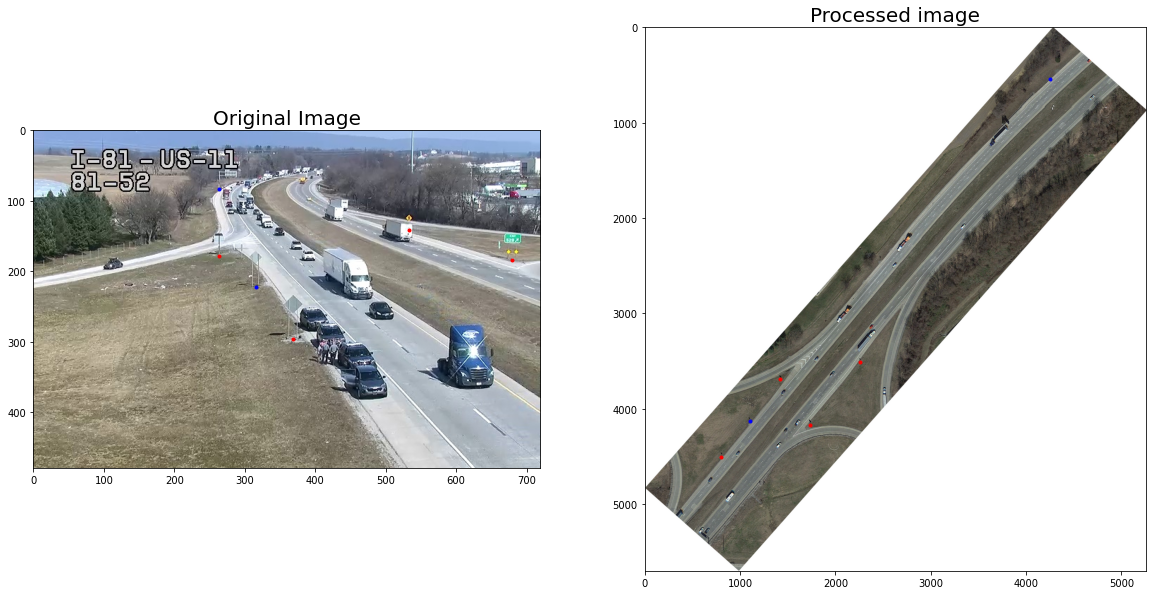

In [18]:
map_file = './images/SkyView.jpg'
ret = displayPoints(SRC, M, './images/frame_view2.jpg', map_file)

[ 801. 4504.] -> [369. 296.]
[1419. 3694.] -> [264. 178.]
[1730. 4167.] -> [679. 184.]
[2255. 3512.] -> [533. 141.]
[1088. 4148.] -> [317.45883 225.17657]
[3746. 1015.] -> [247.21751  90.16118]


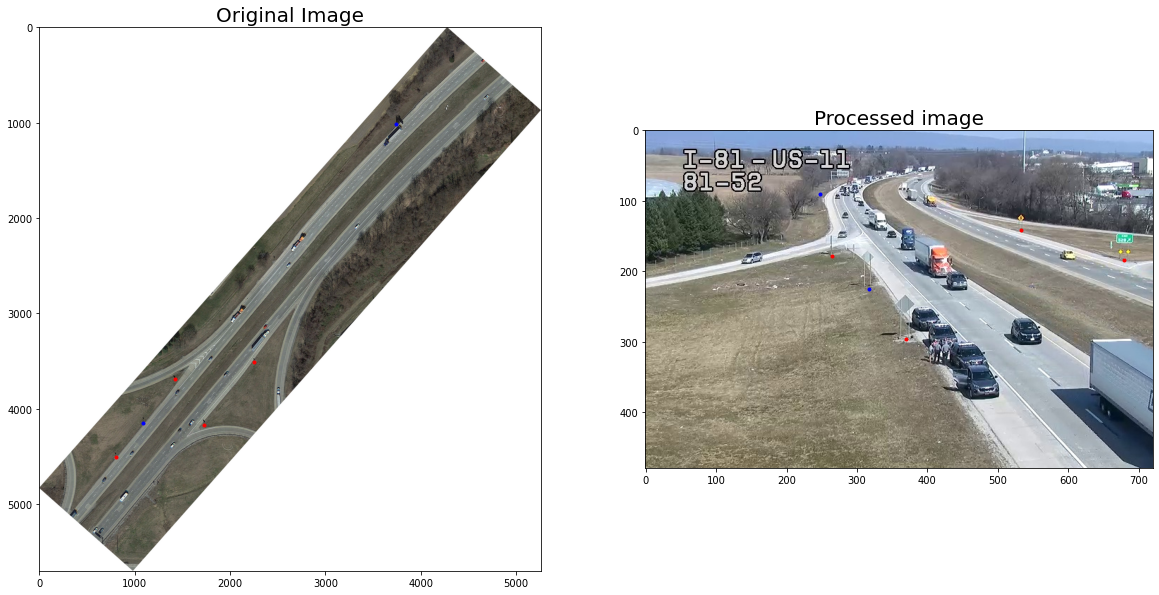

In [19]:
ret = displayPoints(DST, Minv, map_file,  './images/frame_view1.jpg')

# Lane masks

In [ ]:
MASK_PATH = './images/mask.png'

In [ ]:


mask = (255*plt.imread(MASK_PATH)).astype(int)
if (len(mask.shape) == 3) and (mask.shape[2] > 1):
    #mask = np.sum(mask, axis=2)
    mask = mask[:, :, 0]
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

### Processing mask
Tamper with this code and run it, if something is wrong with the mask

In [ ]:
order = np.argsort(unique[1])[::-1]
unique_sorted = (unique[0][order], unique[1][order])
print (unique_sorted)

In [ ]:
mask[~np.isin(mask, (10, 20, 30, 40, 50))] = 0
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

In [ ]:
tmp = mask.copy()
tmp[tmp!=50] = 0
plt.imshow(tmp, cmap='gray')

In [ ]:
for i in np.unique(mask)[1:]:
    f = plt.figure()
    img = i * (mask == i)
    plt.imshow(img, cmap='gray')
    plt.title(i)